In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
sns.set()

In [5]:
flights=sns.load_dataset('flights')

In [6]:
tips=sns.load_dataset('tips')

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [11]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

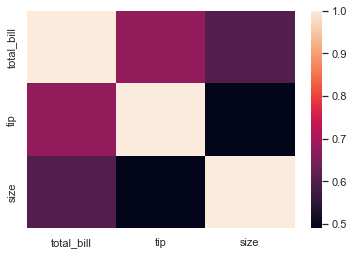

In [12]:
sns.heatmap(tips.corr())

<AxesSubplot:>

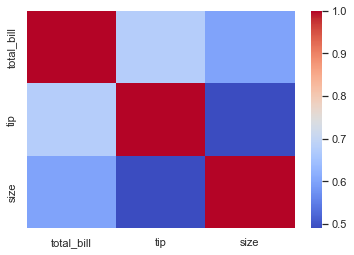

In [13]:
sns.heatmap(tips.corr(),cmap='coolwarm')

In [16]:
flights.pivot_table(values='passengers',index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [17]:
plot=flights.pivot_table(values='passengers',index='month', columns='year')

<AxesSubplot:xlabel='year', ylabel='month'>

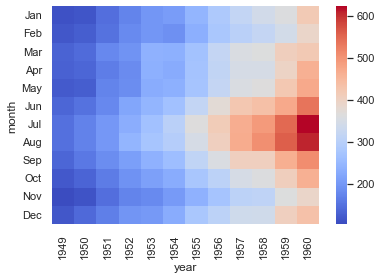

In [20]:
sns.heatmap(plot,cmap='coolwarm')

In [21]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


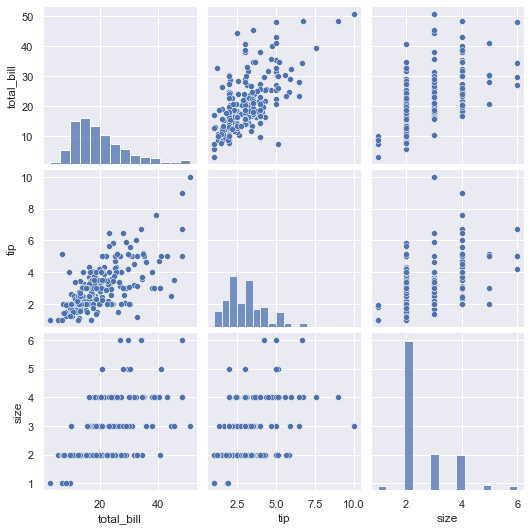

In [24]:
sns.pairplot(tips)

In [25]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [27]:
X=tips[['total_bill','size']]

In [28]:
X

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [43]:
y=tips['tip']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm=LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression()

In [51]:
lm.coef_

array([0.10444841, 0.14976142])

In [52]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])

In [53]:
cdf

,Coef
total_bill,0.104448
size,0.149761


In [55]:
predictions=lm.predict(X_test)

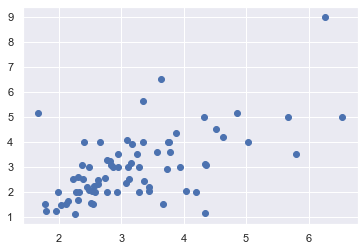

In [56]:
plt.scatter(predictions,y_test)

In [62]:
from sklearn import metrics

In [65]:
metrics.mean_absolute_percentage_error(y_test,predictions)

0.33162783118605516

In [66]:
metrics.mean_absolute_error(y_test,predictions) #996

0.8303922974709631

In [67]:
metrics.mean_squared_error(y_test,predictions)

1.2873556796674928